In [1]:
import glob, os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from itertools import chain

from catboost import CatBoostRanker, CatBoostClassifier

In [2]:
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

In [3]:
BASE_DIR = "/Users/artemvopilov/Programming/yandex_cup_2023"

In [4]:
DATA_DIR = f"{BASE_DIR}/data"

TRAIN_DF_PATH = f"{DATA_DIR}/train.csv"
TEST_DF_PATH = f"{DATA_DIR}/test.csv"

### Read predictions

In [21]:
preds_dfs = {}
for fp in os.listdir(f'{BASE_DIR}/notebooks'):
    if not os.path.isfile(fp):
        continue
    if not (fp.startswith('prediction') and fp.endswith('.csv') and 'final' not in fp):
        continue

    print(f'reading from {fp}')
    pred_name = fp.split('.')[0].split('prediction_')[1]
    preds = pd.read_csv(fp)

    preds_dfs[pred_name] = preds

reading from prediction_vae_als.csv
reading from prediction_knn_first_e_vae.csv
reading from prediction_lstm_normed_2.csv
reading from prediction_knn_normed.csv
reading from prediction_lstm_pca.csv
reading from prediction_lstm_normed.csv
reading from prediction_knn_pca.csv
reading from prediction_pca_als.csv
reading from prediction_pca_als_2.csv
reading from prediction_normed_lstm_dssm_dot.csv
reading from prediction_knn_vae.csv
reading from prediction_lstm_vae_2.csv
reading from prediction_vae_dssm_cos.csv
reading from prediction_knn_vae_last.csv
reading from prediction_knn_normed_lstm.csv
reading from prediction_normder_lstm_als.csv
reading from prediction_normed_lstm_dssm_cos.csv
reading from prediction_lstm_vae.csv
reading from prediction_vae_dssm_dot.csv


### Read data

In [22]:
train_df = pd.read_csv(TRAIN_DF_PATH)
test_df = pd.read_csv(TEST_DF_PATH)

### Prepare data

In [23]:
train_tracks = train_df['track'].unique()
len(train_tracks)

51134

In [24]:
test_tracks = test_df['track'].unique()
len(test_tracks)

25580

In [25]:
all_tracks = list(set(train_tracks) | set(test_tracks))
len(all_tracks)

76714

In [26]:
all_tags = list(range(256))

In [27]:
feature_df = pd.DataFrame({
    'track': np.repeat(all_tracks, len(all_tags)),
    'tag': np.tile(all_tags, len(all_tracks)),
})

In [28]:
feature_df.shape

(19638784, 2)

In [29]:
feature_df.head(260)

,track,tag
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
5,0,5
6,0,6
7,0,7
8,0,8
9,0,9


### Add features

In [48]:
for feature_name, pred_df in tqdm(preds_dfs.items()):
    print(feature_name)
    track_to_features = dict(zip(pred_df['track'], pred_df['prediction']))

    features = []
    for t in all_tracks:        
        t_features = np.exp(np.array(list(map(float, track_to_features[t].split(',')))))
        t_features_sum = np.sum(t_features)
        t_features = t_features / t_features_sum
        features.append(t_features)
    
    features = list(chain.from_iterable(features))
    feature_df[feature_name] = features

  0%|          | 0/19 [00:00<?, ?it/s]

vae_als
knn_first_e_vae
lstm_normed_2
knn_normed
lstm_pca
lstm_normed
knn_pca
pca_als
pca_als_2
normed_lstm_dssm_dot
knn_vae
lstm_vae_2
vae_dssm_cos
knn_vae_last
knn_normed_lstm
normder_lstm_als
normed_lstm_dssm_cos
lstm_vae
vae_dssm_dot


In [49]:
feature_df.head()

,track,tag,vae_als,knn_first_e_vae,lstm_normed_2,knn_normed,lstm_pca,lstm_normed,knn_pca,pca_als,pca_als_2,normed_lstm_dssm_dot,knn_vae,lstm_vae_2,vae_dssm_cos,knn_vae_last,knn_normed_lstm,normder_lstm_als,normed_lstm_dssm_cos,lstm_vae,vae_dssm_dot
0,0,0,0.004258,0.004269,0.000135,0.003849,0.050056,0.000109,0.003850,0.002112,0.002114,7.005398e-05,0.003850,0.000459,0.003907,0.003824,0.003849,0.004061,0.004237,0.000381,5.982370e-03
1,0,1,0.006499,0.008964,0.409729,0.010462,0.175245,0.228017,0.010466,0.006044,0.006046,2.245099e-04,0.010466,0.369324,0.003906,0.005024,0.010464,0.006942,0.004237,0.275791,5.112720e-191
2,0,2,0.004022,0.003852,0.000432,0.003849,0.018188,0.000257,0.003850,0.003163,0.003165,3.933071e-07,0.003850,0.000160,0.003906,0.003824,0.003849,0.003871,0.000574,0.000177,1.454570e-07
3,0,3,0.003951,0.004047,0.000411,0.003849,0.013764,0.000188,0.003850,0.003563,0.003562,1.803016e-03,0.004092,0.002058,0.003906,0.004587,0.003849,0.003884,0.004237,0.000412,1.077642e-04
4,0,4,0.003874,0.003852,0.000014,0.003849,0.004568,0.000007,0.003850,0.003669,0.003669,6.711705e-06,0.003850,0.000010,0.003906,0.003824,0.003849,0.004027,0.004226,0.000023,7.946376e-12


In [50]:
feature_df.shape

(19638784, 21)

### Split feature df

In [51]:
%%time

train_tracks_s = set(train_tracks)
test_tracks_s = set(test_tracks)

train_feature_df = feature_df[feature_df['track'].isin(train_tracks_s)]
test_feature_df = feature_df[feature_df['track'].isin(test_tracks_s)]

CPU times: user 3.77 s, sys: 5.81 s, total: 9.57 s
Wall time: 14.8 s


In [52]:
train_feature_df.shape, test_feature_df.shape

((13090304, 21), (6548480, 21))

### Add targets

In [53]:
track_to_tags = {tr: set(map(int, t.split(','))) for tr, t in zip(train_df['track'].values, train_df['tags'].values)}
track_to_tags

{49734: {5, 6, 9, 26, 32, 55, 96},
 67845: {6, 9, 28, 39, 145, 155},
 25302: {0, 6, 28, 40, 116, 168},
 57796: {28, 186},
 13676: {6, 23, 177},
 29968: {43, 183, 252},
 38652: {0, 10, 48},
 23887: {35, 112, 191},
 44661: {0, 16},
 26449: {6, 9, 32, 85, 122},
 16511: {6, 145, 187, 241},
 32609: {0, 8, 40, 248},
 43932: {0, 1, 8, 12, 13},
 13941: {0, 7, 8, 38, 80},
 20065: {6, 145, 241},
 53370: {1, 5, 15, 35, 64, 70, 99, 165},
 62174: {1, 5, 104, 172},
 52322: {0, 2, 8, 32, 51},
 41853: {1, 15, 25, 71, 92, 99},
 58614: {0, 8, 30, 51},
 22115: {3, 35, 55, 73, 112, 146, 198},
 34257: {6, 122},
 63054: {0, 1, 2, 8, 128},
 850: {6, 145, 170},
 2980: {6, 215},
 31505: {0, 80, 100, 156},
 27354: {0, 4, 7, 16, 88},
 38840: {0, 2, 8, 9, 24, 40, 141},
 71885: {0, 4, 7, 8},
 7290: {0, 7, 57},
 5201: {6, 215},
 22749: {6, 158},
 23811: {2, 6, 9, 26, 32, 47, 103, 117, 151},
 2248: {0, 28, 182},
 57495: {0, 5, 8, 10, 80},
 36136: {0, 2, 8, 51},
 45537: {9, 45, 47},
 42745: {1, 5, 45, 75, 119},
 1621

In [54]:
%%time

targets = train_feature_df.apply(lambda row: 1 if row['tag'] in track_to_tags[row['track']] else 0, axis=1).astype(int)

CPU times: user 2min 22s, sys: 9.51 s, total: 2min 31s
Wall time: 2min 38s


In [55]:
train_feature_df['target'] = targets

/var/folders/zx/qc06bh8n1sl80x1x3xp2j5qw0000gn/T/ipykernel_30266/3555885666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_feature_df['target'] = targets


In [56]:
train_feature_df.shape

(13090304, 22)

In [57]:
train_feature_df.head()

,track,tag,vae_als,knn_first_e_vae,lstm_normed_2,knn_normed,lstm_pca,lstm_normed,knn_pca,pca_als,pca_als_2,normed_lstm_dssm_dot,knn_vae,lstm_vae_2,vae_dssm_cos,knn_vae_last,knn_normed_lstm,normder_lstm_als,normed_lstm_dssm_cos,lstm_vae,vae_dssm_dot,target
0,0,0,0.004258,0.004269,0.000135,0.003849,0.050056,0.000109,0.003850,0.002112,0.002114,7.005398e-05,0.003850,0.000459,0.003907,0.003824,0.003849,0.004061,0.004237,0.000381,5.982370e-03,0
1,0,1,0.006499,0.008964,0.409729,0.010462,0.175245,0.228017,0.010466,0.006044,0.006046,2.245099e-04,0.010466,0.369324,0.003906,0.005024,0.010464,0.006942,0.004237,0.275791,5.112720e-191,1
2,0,2,0.004022,0.003852,0.000432,0.003849,0.018188,0.000257,0.003850,0.003163,0.003165,3.933071e-07,0.003850,0.000160,0.003906,0.003824,0.003849,0.003871,0.000574,0.000177,1.454570e-07,0
3,0,3,0.003951,0.004047,0.000411,0.003849,0.013764,0.000188,0.003850,0.003563,0.003562,1.803016e-03,0.004092,0.002058,0.003906,0.004587,0.003849,0.003884,0.004237,0.000412,1.077642e-04,0
4,0,4,0.003874,0.003852,0.000014,0.003849,0.004568,0.000007,0.003850,0.003669,0.003669,6.711705e-06,0.003850,0.000010,0.003906,0.003824,0.003849,0.004027,0.004226,0.000023,7.946376e-12,0


### Check train data

In [58]:
def plot_distr(df, column, kind='kde'):
    plt.figure(figsize=(10,10))
    sns.displot(data=df, x=column, kind=kind)
    plt.title(column)
    plt.show

In [ ]:
plot_distr(train_feature_df, 'vae_als')

<Figure size 1000x1000 with 0 Axes>

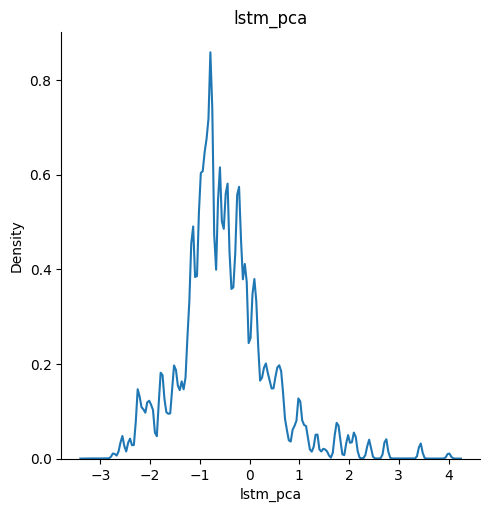

In [63]:
plot_distr(train_feature_df, 'lstm_pca')

<Figure size 1000x1000 with 0 Axes>

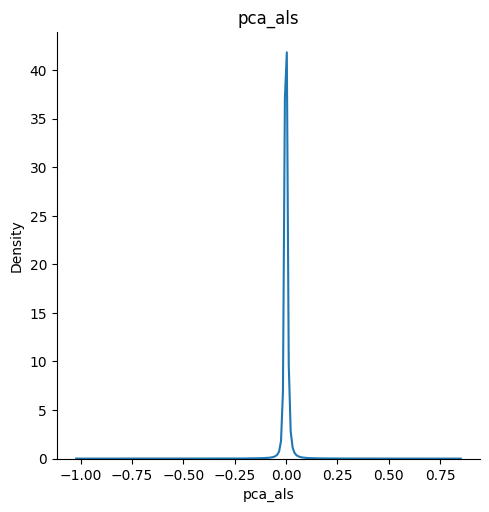

In [64]:
plot_distr(train_feature_df, 'pca_als')

<Figure size 1000x1000 with 0 Axes>

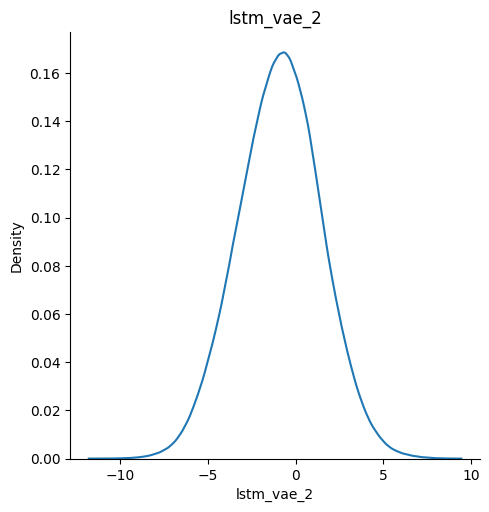

In [66]:
plot_distr(train_feature_df, 'lstm_vae_2')

<Figure size 1000x1000 with 0 Axes>

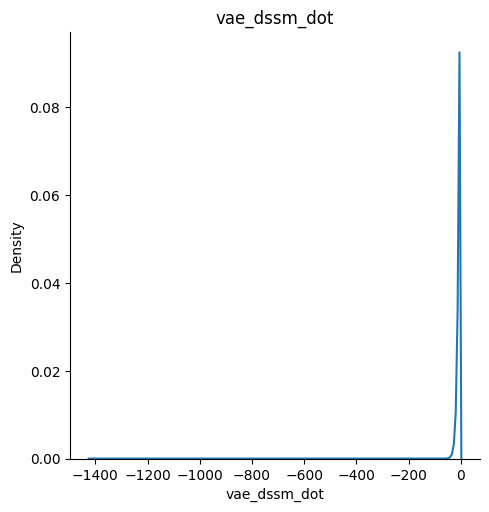

In [67]:
plot_distr(train_feature_df, 'vae_dssm_dot')

### Prepare for ranking

In [59]:
def process_for_ranking(df):
    df = df.sort_values(['track'])
    df['group_id'] = df.groupby(['track']).ngroup()
    return df
    
train_feature_rank_df = process_for_ranking(train_feature_df)

In [60]:
train_feature_rank_df.head(300)

,track,tag,vae_als,knn_first_e_vae,lstm_normed_2,knn_normed,lstm_pca,lstm_normed,knn_pca,pca_als,pca_als_2,normed_lstm_dssm_dot,knn_vae,lstm_vae_2,vae_dssm_cos,knn_vae_last,knn_normed_lstm,normder_lstm_als,normed_lstm_dssm_cos,lstm_vae,vae_dssm_dot,target,group_id
0,0,0,0.004258,0.004269,1.352614e-04,0.003849,0.050056,1.093019e-04,0.003850,0.002112,0.002114,7.005398e-05,0.003850,4.586335e-04,0.003907,0.003824,0.003849,0.004061,0.004237,3.809436e-04,5.982370e-03,0,0
162,0,162,0.003844,0.003852,8.347511e-07,0.003849,0.000609,4.503173e-06,0.003850,0.003890,0.003890,4.846628e-02,0.003850,3.976796e-07,0.003907,0.003824,0.003849,0.003916,0.004237,1.082857e-06,6.474523e-04,0,0
163,0,163,0.003862,0.003852,5.546001e-07,0.003849,0.000347,1.683407e-07,0.003850,0.003861,0.003860,2.539067e-05,0.003850,4.722452e-07,0.003907,0.003824,0.003849,0.003813,0.004236,3.600254e-08,1.784272e-04,0,0
164,0,164,0.003861,0.003852,1.583496e-05,0.003849,0.002572,3.515205e-04,0.003850,0.003947,0.003947,1.477483e-06,0.003850,8.934712e-05,0.003906,0.004188,0.003849,0.003836,0.000576,2.887916e-04,1.388166e-05,0,0
165,0,165,0.003978,0.004273,4.422645e-03,0.004334,0.004786,5.148075e-03,0.004337,0.003970,0.003970,6.360413e-03,0.003850,5.714926e-03,0.003906,0.005502,0.004111,0.004049,0.004237,1.650668e-02,1.543249e-04,0,0
166,0,166,0.003893,0.003852,1.080182e-08,0.003849,0.000379,2.039528e-07,0.003850,0.003891,0.003891,2.317028e-02,0.003850,1.047976e-07,0.003906,0.003824,0.003849,0.003893,0.004237,3.502461e-07,4.861948e-04,0,0
167,0,167,0.003883,0.003852,6.873835e-05,0.003849,0.001634,3.652930e-04,0.003850,0.003950,0.003950,8.726003e-05,0.003850,1.176736e-04,0.003906,0.004587,0.003849,0.003846,0.004234,1.628940e-04,8.058323e-03,0,0
168,0,168,0.003856,0.003852,3.289130e-07,0.003849,0.000545,8.479319e-07,0.003850,0.003856,0.003856,4.758756e-03,0.003850,4.133637e-07,0.003906,0.003824,0.003849,0.003841,0.004237,2.159560e-07,5.051398e-03,0,0
169,0,169,0.003901,0.003852,8.082012e-06,0.003849,0.000741,1.888982e-05,0.003850,0.003926,0.003925,1.235191e-03,0.003850,7.887969e-06,0.003906,0.003824,0.003849,0.003894,0.004235,1.594252e-05,2.902459e-05,0,0
170,0,170,0.003863,0.003852,1.262442e-05,0.003849,0.003827,2.373863e-05,0.003850,0.003903,0.003903,2.002667e-04,0.003850,1.645261e-04,0.003906,0.003824,0.003849,0.003844,0.004236,1.304658e-04,1.375968e-07,0,0


### Train catboost

In [80]:
model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.01,
    l2_leaf_reg=10,
    loss_function='Logloss',
    eval_metric='Logloss'
)

# model = CatBoostRanker(
#     iterations=100,
#     depth=6,
#     learning_rate=0.01,
#     l2_leaf_reg=1,
#     loss_function='PairLogit',
#     eval_metric='PairLogit'
# )

In [ ]:
model.fit(
    X=train_feature_df.drop(columns=['track', 'tag', 'target']),
    y=train_feature_df['target'],
    plot=True,
    verbose=False
)

# model.fit(
#     X=train_feature_rank_df.drop(columns=['track', 'tag', 'target', 'group_id']),
#     y=train_feature_rank_df['target'],
#     group_id=train_feature_rank_df['group_id'],
#     plot=True,
#     verbose=False
# )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
# test_feature_df['pred_class_2'] = model.predict_proba(
#     test_feature_df.drop(columns=['track', 'tag', 'pred_class']))[:, 1]

In [ ]:
test_feature_df['pred_class'] = model.predict(
    test_feature_df.drop(columns=['track', 'tag', 'pred_rank']))

### Save preds

In [ ]:
track_to_pred_df = test_feature_df.groupby('track', as_index=False).agg(prediction=('pred_class', list))

In [ ]:
test_tracks_sorted = test_df['track'].values
test_tracks_sorted

In [ ]:
t_to_preds = {}

for t in tqdm(test_tracks_sorted):
    t_preds = np.exp(track_to_pred_df[track_to_pred_df['track'] == t]['prediction'].values[0])
    t_preds_sum = np.sum(t_preds)
    t_preds = t_preds / t_preds_sum
    t_to_preds[t] = ','.join(map(str, t_preds))

predictions_df = pd.DataFrame([
    {'track': t, 'prediction': t_to_preds[t]}
    for t in test_tracks_sorted
])

In [ ]:
predictions_df.head()

In [ ]:
predictions_df.shape

In [ ]:
predictions_df.to_csv('prediction_final_fff222_cb_class.csv', index=False)